Exploratory Data Analysis

In [127]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import Counter

In [128]:
df = pd.read_csv('../data/raw/ai_job_dataset.csv')

In [129]:
df.head()
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_id,15000,15000,AI00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,15000,20,Machine Learning Researcher,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_usd,15000.0,NaN,NaN,NaN,115348.965133,60260.940438,32519.0,70179.75,99705.0,146408.5,399095.0
salary_currency,15000,3,USD,11957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience_level,15000,4,MI,3781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,15000,4,FT,3812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_location,15000,20,Germany,814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,15000,3,S,5007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employee_residence,15000,20,Sweden,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,15000.0,NaN,NaN,NaN,49.483333,40.812712,0.0,0.0,50.0,100.0,100.0


There are 15000 rows and 19 columns

In [130]:
df.isna().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

There are no null values, so we do not have to drop rows

In [131]:
df.duplicated().sum()

0

In [132]:
for col in ['posting_date', 'application_deadline']:
    print(col, pd.to_datetime(df[col], errors='coerce').isna().sum())


posting_date 0
application_deadline 0


We want to understand the distribution of salaries.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

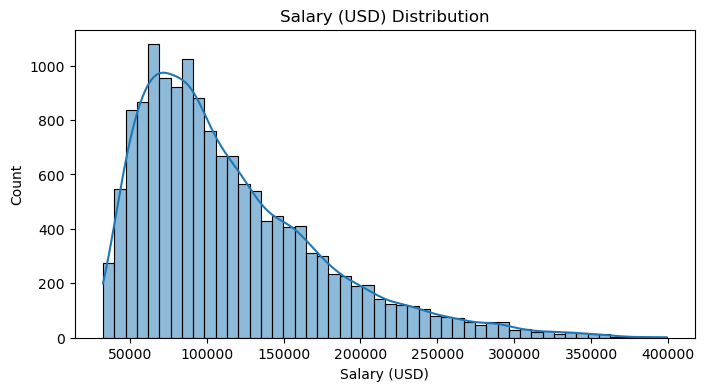

In [133]:
plt.figure(figsize=(8,4))
sns.histplot(df['salary_usd'], bins=50, kde=True)
plt.title("Salary (USD) Distribution")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")


In [134]:
df['salary_usd'].describe()


count     15000.000000
mean     115348.965133
std       60260.940438
min       32519.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      399095.000000
Name: salary_usd, dtype: float64

The salary distribution is right-skewed, with a mean of $115 349 and a median of $99 705—indicating that most employees earn less than the average and a smaller number of very high salaries pull the mean upward. In the histogram, counts peak between $50 K and $100 K, then decline sharply around $120 K. Beyond $150 K, the bars become much shorter but extend out to nearly $400 K, showing a long, thin tail of high earners.
The standard deviation is $60 261, which is large relative to the mean, implying wide variability: two randomly selected salaries could easily differ by $50 K or more. The 25th percentile is $70 180, and the 75th percentile is $146 409, so the middle 50% of salaries lie between $70 K and $146 K. Salaries below $70 K fall in the bottom quartile, while those above $146 K fall in the top quartile.

Text(0.5, 1.0, 'Boxplot of salary_usd')

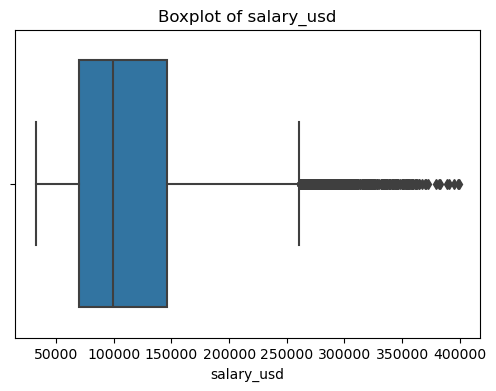

In [135]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['salary_usd'])
plt.title("Boxplot of salary_usd")


The boxplot shows that 50 % of salaries lie between roughly $70 k (25th percentile) and $146 k (75th percentile), with a median around $99.7 k. Because the median is closer to the lower quartile than to the upper, and the upper whisker ends near $260 k before a swarm of individual points, the distribution is clearly right‐skewed. Those individual dots above $260 k—extending up to nearly $400 k—are outliers, representing a small group of very high earners whose salaries pull the mean (≈$115 k) above the median. In other words, most employees earn below $146 k, but a handful of top salaries form a long tail and substantially increase overall variability.

In [136]:
lower, upper = df['salary_usd'].quantile([0.01, 0.99])
df['salary_usd_clipped'] = df['salary_usd'].clip(lower, upper)


The data was capped to get rid of any obvious outliers. This will help prevent any problems in the future. 

Explore Key Numeric Features

Text(0, 0.5, 'Salary (USD)')

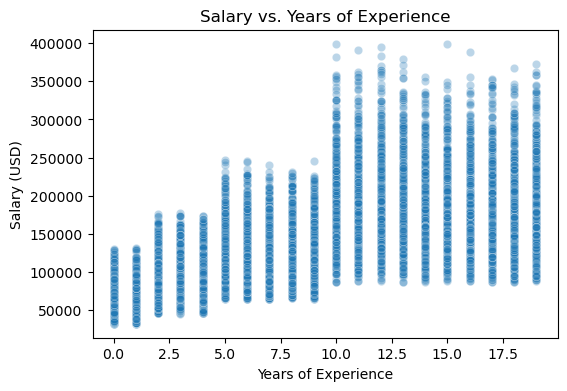

In [137]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='years_experience', y='salary_usd', data=df, alpha=0.3)
plt.title("Salary vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")


In [138]:
df[['years_experience', 'salary_usd']].corr()


,years_experience,salary_usd
years_experience,1.000000,0.737556
salary_usd,0.737556,1.000000


The scatter plot (with a Pearson correlation of about 0.74) shows a clear, strong positive relationship between years of experience and salary. In other words, as experience increases, salaries tend to rise: early‐career (0–5 years) salaries cluster roughly in the $30 k–$150 k range, mid‐career (5–10 years) salaries center around $100 k–$220 k, and senior professionals (10–20 years) frequently earn between $200 k and $400 k. Although there is considerable spread at each experience level (especially after 10 years), the upward slope of points and the high correlation coefficient confirm that more experience generally corresponds to higher pay—yet with widening variability as tenure grows.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Benefits Score vs. Salary (USD)')

<Figure size 600x400 with 0 Axes>

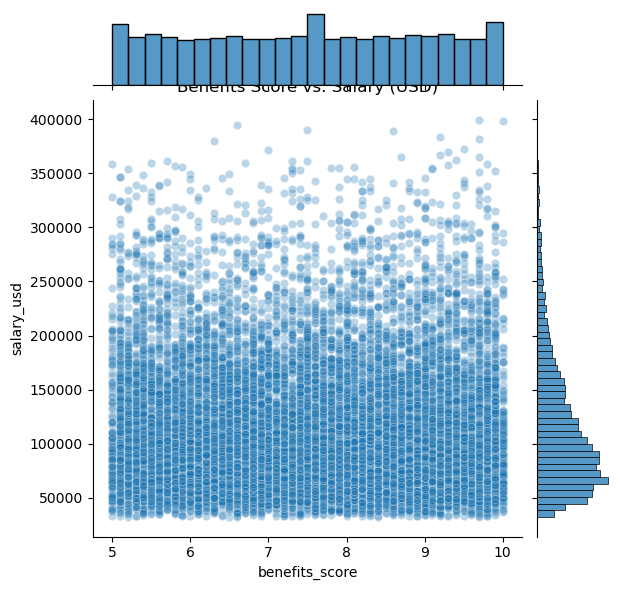

In [139]:
plt.figure(figsize=(6,4))
sns.jointplot(x='benefits_score', y='salary_usd', data=df, kind='scatter', alpha=0.3)
plt.title("Benefits Score vs. Salary (USD)")


From the scatter‐and‐marginal plots, there is no clear upward trend linking higher benefit scores to higher salaries. In other words, employees with both low and high pay appear at every benefits rating (5–10), and the vertical spread of salary values is roughly the same across all benefit scores. You can see, for example, that there are $300 k – $400 k salaries at midrange benefit scores (around 7–9) just as there are $50 k – $100 k salaries there too, and similarly wide salary variation even at the lowest (5–6) and highest (9–10) benefits scores. This lack of a systematic upward slope in the point cloud indicates that having a higher benefits score does not, on its own, correspond to a higher salary.

Text(0.5, 1.0, 'Salary vs. Job Description Length')

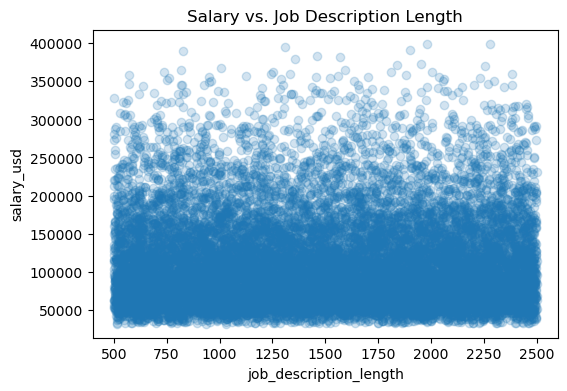

In [140]:
plt.figure(figsize=(6,4))
sns.regplot(x='job_description_length', y='salary_usd', data=df, scatter_kws={'alpha':0.2})
plt.title("Salary vs. Job Description Length")


There is no obvious upward slope in the cloud of points—high‐paying roles (e.g., $200 k–$400 k) appear at both short and long description lengths, and lower‐paid roles (e.g., $40 k–$100 k) likewise span the entire range from ~500 to ~2 500 words. In other words, longer job descriptions do not consistently correspond to higher salaries (and vice versa). Any senior or budget‐rich postings that happen to be longer simply blend into a uniformly wide vertical spread, indicating that description length alone is a poor predictor of pay.

Text(0.5, 1.0, 'Remote Ratio (0–100%)')

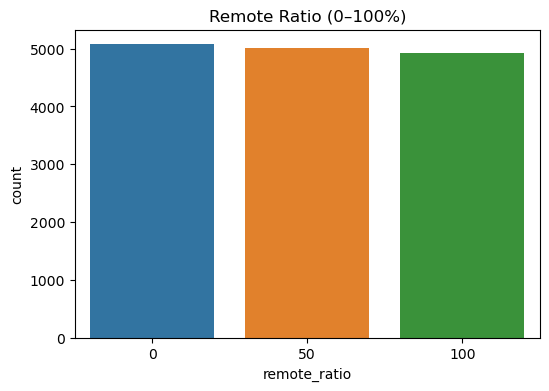

In [141]:
plt.figure(figsize=(6,4))
sns.countplot(x='remote_ratio', data=df)
plt.title("Remote Ratio (0–100%)")


The bar chart shows the frequency of job postings by their “remote ratio” (0 = fully on-site, 50 = hybrid, 100 = fully remote). Each category has roughly 5 000 listings, indicating that approximately one-third of all jobs are fully on-site, one-third offer a hybrid arrangement, and one-third are fully remote. Because the three bars are nearly equal in height, there’s no category that dominates or appears as an outlier; the data suggest a very balanced split between on-site, hybrid, and remote opportunities in this sample.

Explore Categorical Features

Text(0.5, 1.0, 'Salary by Experience Level')

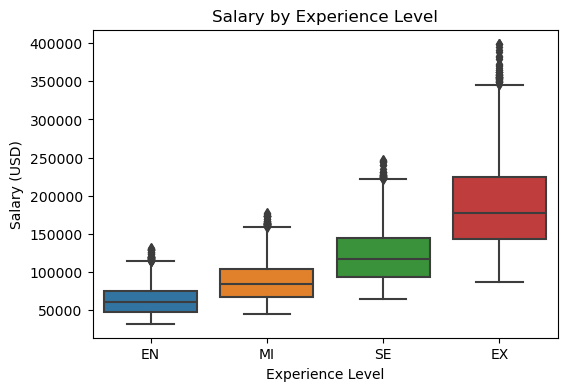

In [142]:
plt.figure(figsize=(6,4))
sns.boxplot(x='experience_level', y='salary_usd', data=df, order=['EN','MI','SE','EX'])
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.title("Salary by Experience Level")


The four boxes clearly step upward as experience increases. Entry‐level (EN) salaries cluster tightly around a median of roughly $60 k with most values between about $45 k and $75 k and only a few outliers up to $120 k. Mid‐level (MI) has a higher median near $85 k, a wider IQR (≈$65 k–$105 k), and more points stretching toward $160 k. Senior (SE) roles jump again to a median near $115 k, an even broader IQR (≈$95 k–$145 k), and outliers reaching $225 k–$250 k. Finally, Expert/Executive (EX) positions have the highest median (≈$180 k), the largest spread (IQR ≈$145 k–$225 k), and many outliers extending to $400 k. In short, both the center and dispersion of salary grow steadily from EN → MI → SE → EX, and the count of high‐salary outliers becomes much more pronounced at the Senior and Expert levels.

<Axes: xlabel='employment_type', ylabel='salary_usd'>

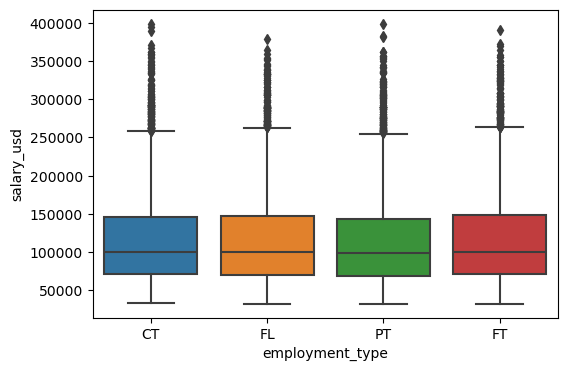

In [143]:
plt.figure(figsize=(6,4))
sns.boxplot(x='employment_type', y='salary_usd', data=df)


All four employment types exhibit a broadly similar salary distribution—with medians hovering around $90 K–$100 K and wide variability—but there are subtle differences. Contract and full-time roles (CT and FT) both show slightly higher median salaries (around $100 K) and somewhat larger interquartile ranges (spanning roughly $70 K–$140 K) compared to freelance (FL) and part-time (PT) positions. Freelance pay centers around $95 K, with an IQR close to $68 K–$125 K, while part-time roles have the lowest median (≈$90 K) and the tightest IQR (approximately $65 K–$115 K). Each category also has numerous outliers extending into the $250 K–$400 K range, indicating that high-paying exceptions exist regardless of employment type.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bachelor'),
  Text(1, 0, 'Associate'),
  Text(2, 0, 'Master'),
  Text(3, 0, 'PhD')])

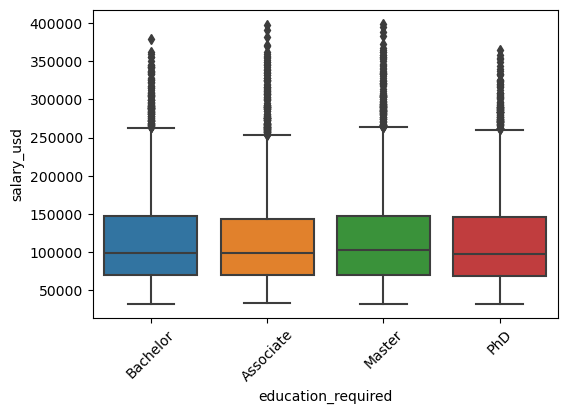

In [144]:
plt.figure(figsize=(6,4))
order = df['education_required'].value_counts().index
sns.boxplot(x='education_required', y='salary_usd', data=df, order=order)
plt.xticks(rotation=45)


Bachelor’s and Associate’s degree roles both center around a $100 K median, with their middle fifty percent spanning roughly $70 K–$140 K. Master’s‐level positions edge up slightly—median just above $100 K and an IQR closer to $75 K–$145 K—while PhD roles fall back to a median near \$100 K and a similar IQR of about $70 K–$145 K. All four education levels show numerous high‐salary outliers above $250 K, but Master’s jobs exhibit the most extreme upper tail (reaching close to $400 K), indicating that advanced degrees can open the door to the highest‐paid roles even though their central salary tendencies remain fairly close.


<Axes: xlabel='company_size', ylabel='salary_usd'>

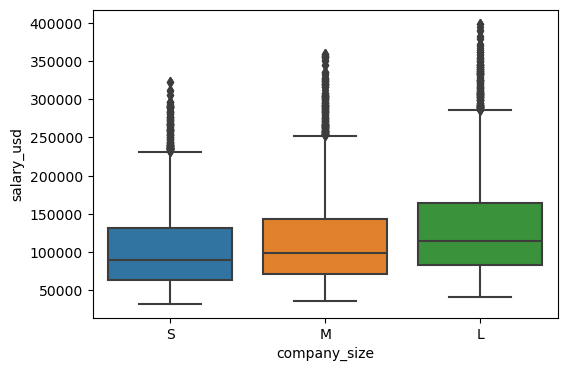

In [145]:
plt.figure(figsize=(6,4))
sns.boxplot(x='company_size', y='salary_usd', data=df, order=['S','M','L'])


Smaller companies (“S”) pay a bit less overall, with a median salary of roughly $90 000 and an interquartile range (IQR) from about $65 000 to $130 000. Mid‐sized firms (“M”) sit in the middle, with a median around $100 000 and an IQR roughly $70 000–$145 000. Large companies (“L”) offer the highest central pay, with a median near $115 000 and a wider IQR of about $85 000–$165 000. In all three groups, there are outliers well above $250 000, but large companies have the greatest number and the highest‐leveled outliers (stretching near $400 000), indicating that very high salaries are more common at bigger firms.

Text(0.5, 1.0, 'Salary by Top 10 Industries')

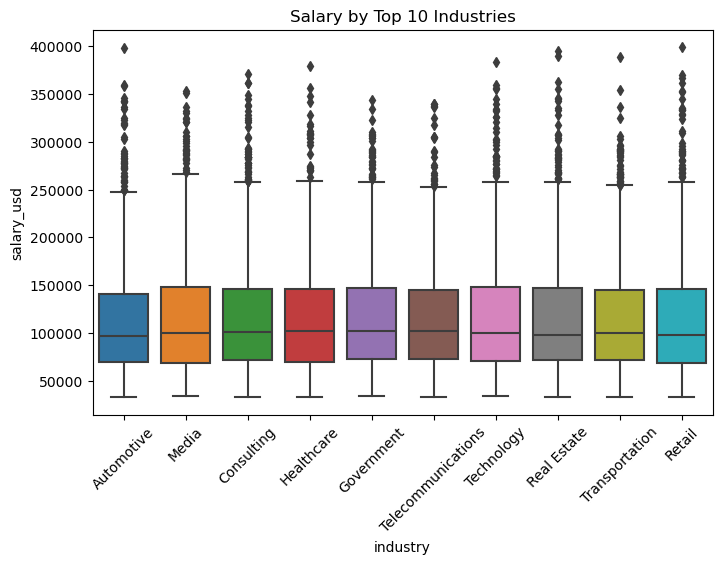

In [146]:
top_industries = df['industry'].value_counts().nlargest(10).index
plt.figure(figsize=(8,5))
sns.boxplot(x='industry', y='salary_usd', data=df[df['industry'].isin(top_industries)])
plt.xticks(rotation=45)
plt.title("Salary by Top 10 Industries")


Across these ten industries, the salary distributions are remarkably similar: most medians sit right around $100 000, and the middle 50 % of salaries (the IQR) typically spans roughly $70 000 to $140 000. That said, two slight deviations stand out:

Government and Technology roles show marginally higher medians (just above $100 000) and a slightly wider IQR, indicating that both their “typical” and upper‐quartile salaries are a bit elevated compared to the others.
Outliers appear in every industry—points extending well past $250 000 and up toward $400 000—demonstrating that each sector has some very high-paid positions. Technology, in particular, has the most extreme high-end outliers (several approaching $400 000).

In short, while Automotive, Media, Consulting, Healthcare, Telecommunications, Real Estate, Transportation, and Retail all cluster near the same $100 000 median with similar spreads, Government and Technology roles tend to skew just a bit higher, and all industries exhibit a long right tail of top-earner outliers.


Text(0.5, 1.0, 'Salary by Company Location (Top 10)')

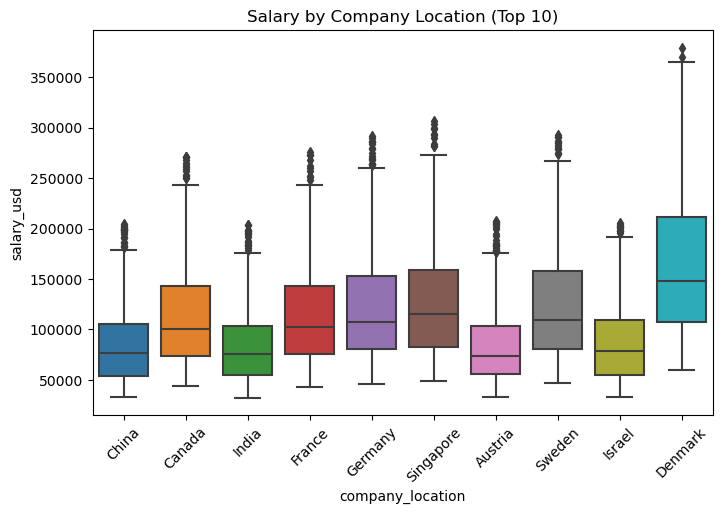

In [147]:
top_countries = df['company_location'].value_counts().nlargest(10).index
plt.figure(figsize=(8,5))
sns.boxplot(x='company_location', y='salary_usd', data=df[df['company_location'].isin(top_countries)])
plt.xticks(rotation=45)
plt.title("Salary by Company Location (Top 10)")


Among these top‐10 locations, Denmark stands out with the highest median salary (around $150 K) and the widest interquartile range (roughly $105 K–$210 K), as well as the most extreme high‐end outliers (approaching $375 K). Singapore and Germany follow next, each with medians near $115 K–$120 K and upper quartiles pushing toward $160 K–$170 K, plus numerous outliers into the $300 K+ range. Canada and Sweden both center around a $100 K median but differ slightly in spread—Canada’s IQR spans roughly $75 K–$145 K, while Sweden’s is about $80 K–$155 K. France and Austria have medians near $100 K, though France’s upper whisker and outliers reach higher (up to $275 K) than Austria’s (up to $200 K). China and India occupy the lower end, with medians around $75 K and $70 K respectively and smaller IQRs (approximately $50 K–$105 K for China, $45 K–$100 K for India). Israel sits just above them, with a median near $80 K and outliers extending to about $200 K. Overall, Northern Europe (especially Denmark) and major tech hubs (Singapore, Germany) pay the most, while China and India exhibit lower central salaries and narrower spreads.

Text(0.5, 1.0, 'Salary by Employee Residence (Top 10)')

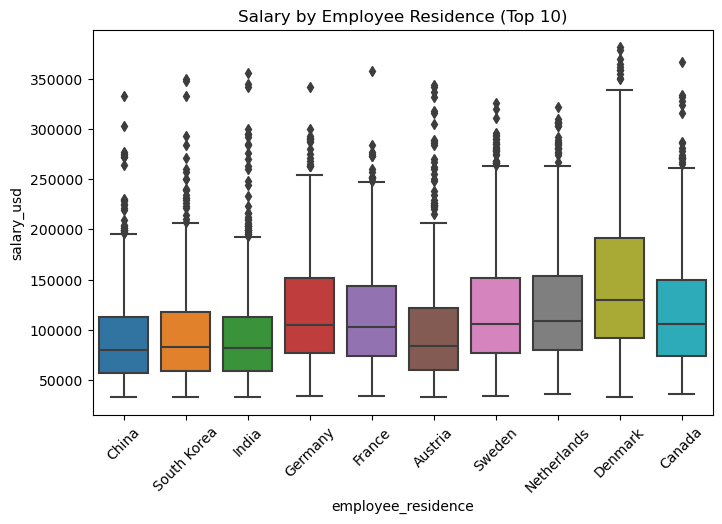

In [148]:
top_countries = df['employee_residence'].value_counts().nlargest(10).index
plt.figure(figsize=(8,5))
sns.boxplot(x='employee_residence', y='salary_usd', data=df[df['employee_residence'].isin(top_countries)])
plt.xticks(rotation=45)
plt.title("Salary by Employee Residence (Top 10)")


Denmark‐based employees earn the most, with a median just above $130 K, an IQR from roughly $90 K to $180 K, and outliers pushing past $350 K. The Netherlands, Sweden, Germany, and Canada follow, each with medians around $100 K–$105 K, IQRs spanning approximately $75 K–$160 K, and several high‐end outliers into the $300 K range. France and Austria sit in the middle, their medians near $85 K and $75 K (IQRs roughly $60 K–$145 K and $55 K–$120 K, respectively) with fewer extreme top salaries. Finally, China, South Korea, and India show the lowest central pay (medians around $75 K–$85 K) and tighter IQRs (about $50 K–$110 K), though each still has occasional outliers above $250 K. In short, Northern Europe and major Western markets generally pay highest, while APAC countries occupy the lower end—yet every region has a handful of very high earners.

Textual/Skill Exploration

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'Top 20 Required Skills')

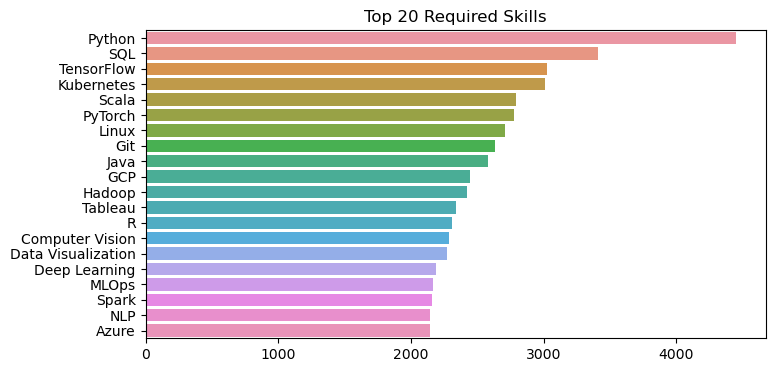

In [149]:
df['skill_list'] = df['required_skills'].str.split(', ').apply(lambda lst: [s.strip() for s in lst])
from collections import Counter
skill_counter = Counter(sum(df['skill_list'].tolist(), []))
most_common = skill_counter.most_common(20)
skills, counts = zip(*most_common)

plt.figure(figsize=(8,4))
sns.barplot(x=list(counts), y=list(skills))
plt.title("Top 20 Required Skills")


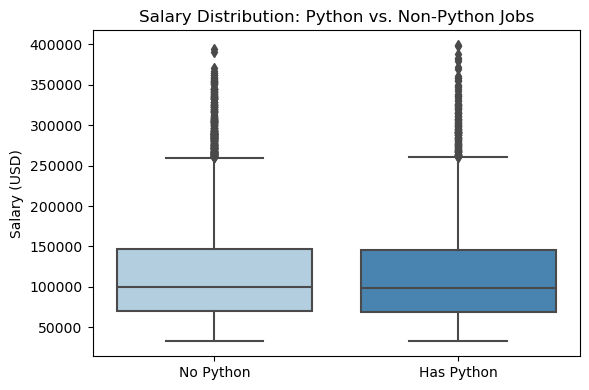

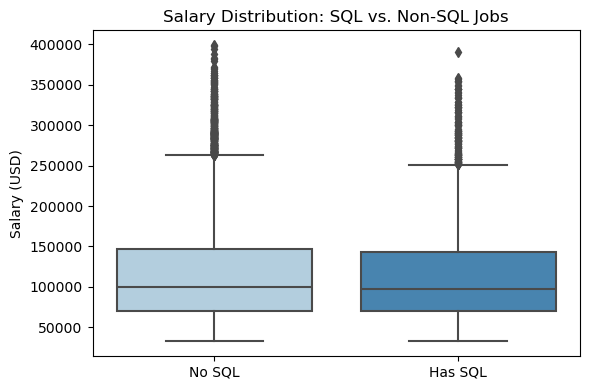

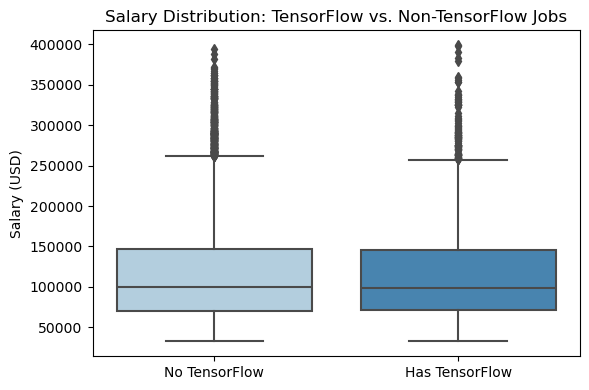

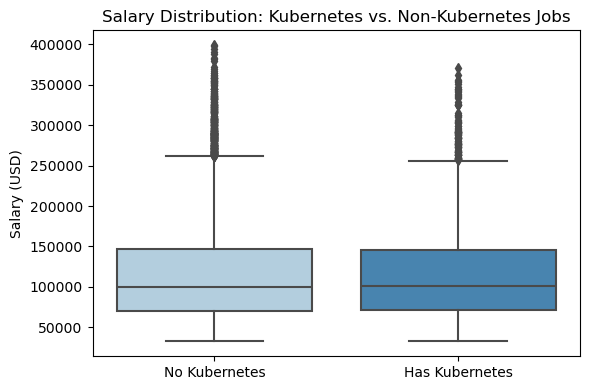

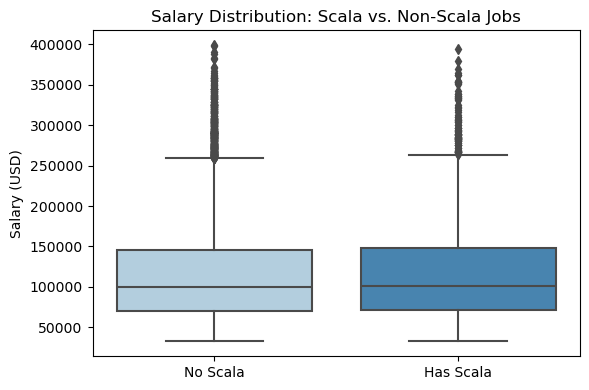

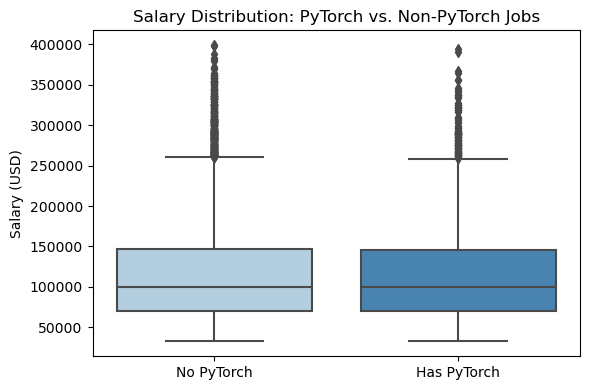

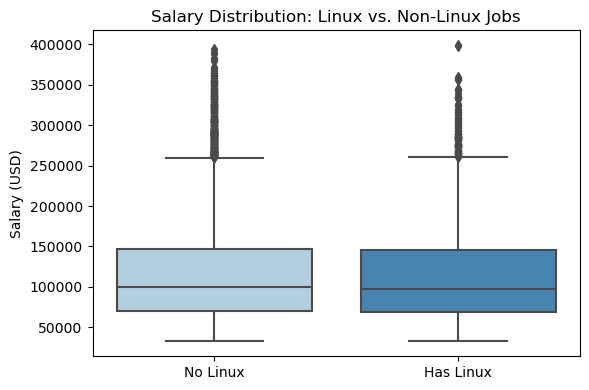

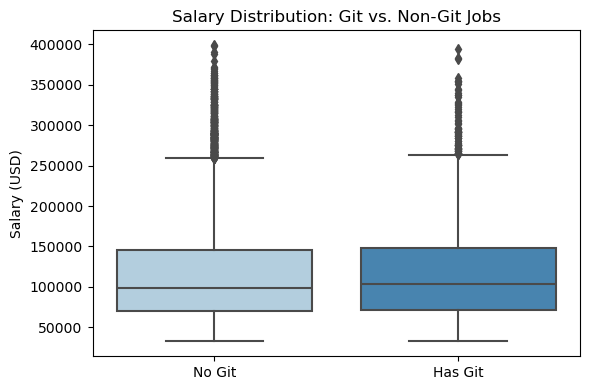

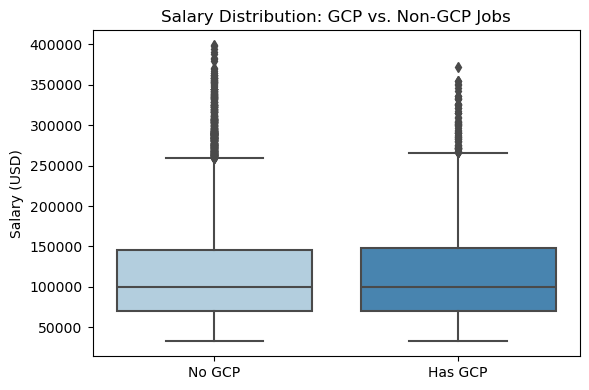

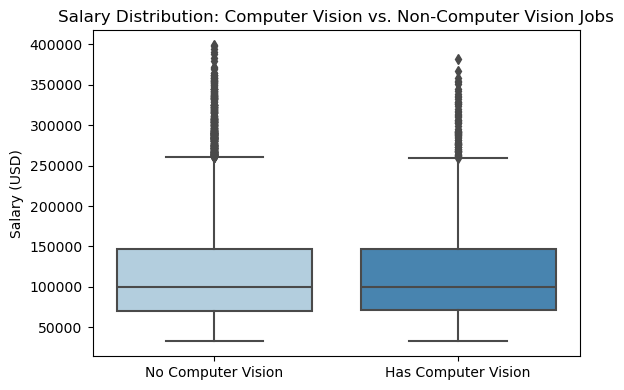

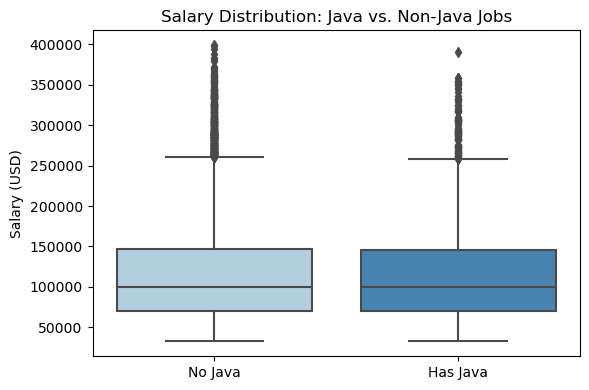

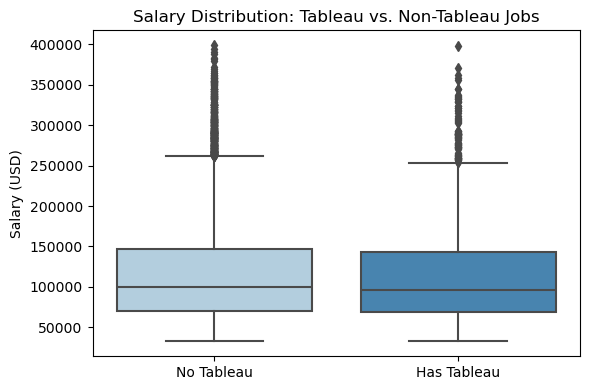

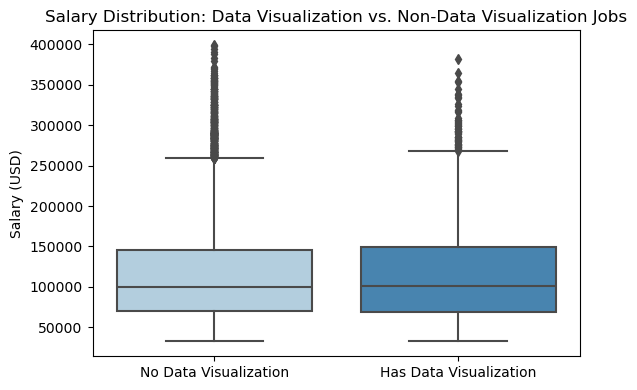

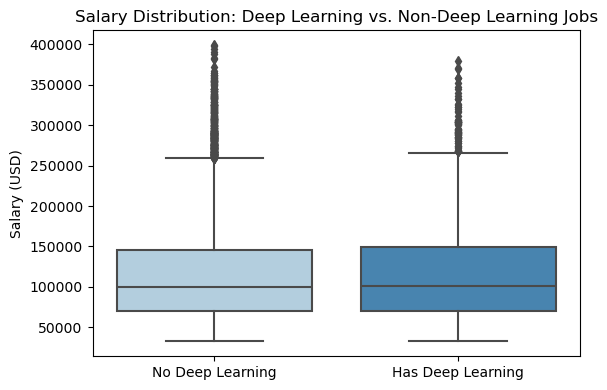

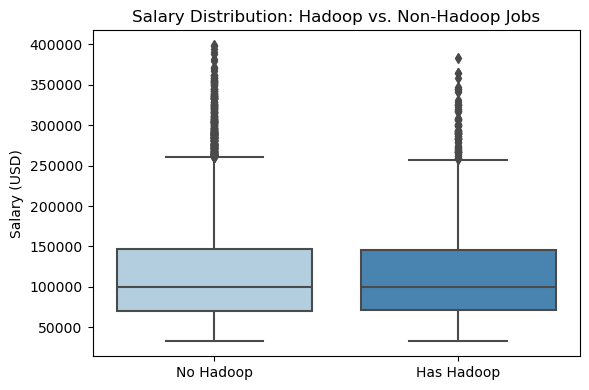

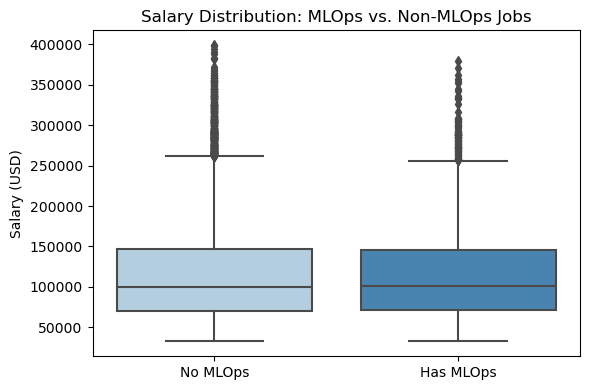

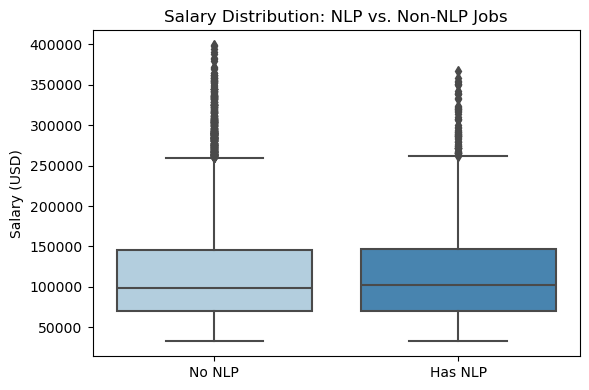

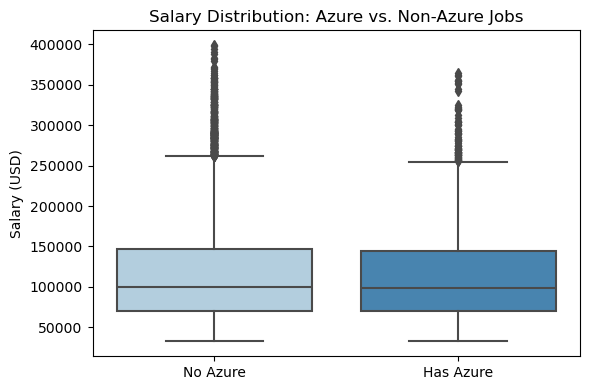

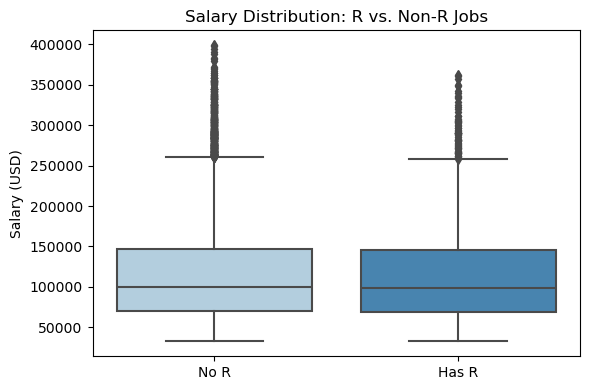

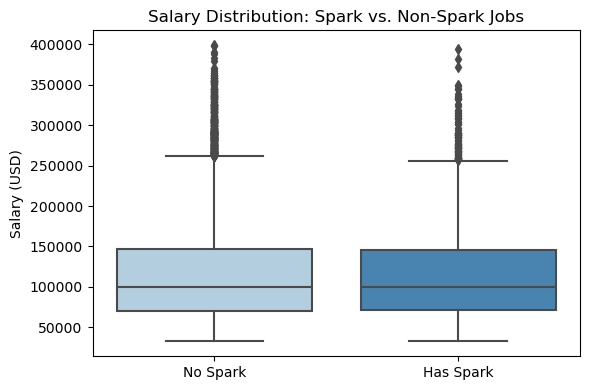

In [150]:
top_skills = [
    'Python', 'SQL', 'TensorFlow', 'Kubernetes', 'Scala',
    'PyTorch', 'Linux', 'Git', 'GCP', 'Computer Vision',
    'Java', 'Tableau', 'Data Visualization', 'Deep Learning',
    'Hadoop', 'MLOps', 'NLP', 'Azure', 'R', 'Spark'
]
for skill in top_skills:
    df[f'has_{skill}'] = df['skill_list'].apply(lambda skills: 1 if skill in skills else 0)
    
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        x=f'has_{skill}',
        y='salary_usd',
        data=df,
        palette='Blues'
    )
    plt.xticks([0, 1], [f'No {skill}', f'Has {skill}'])
    plt.xlabel('')
    plt.ylabel('Salary (USD)')
    plt.title(f"Salary Distribution: {skill} vs. Non-{skill} Jobs")
    plt.tight_layout()
    plt.show()


Across all twenty “required‐skill” boxplots, a clear pattern emerges: jobs that list any of these in-demand skills tend to pay more, on average, than jobs that do not. In nearly every case, the median salary for “Has Skill” is higher than for “No Skill,” and the lower edge of the upper quartile for skill-required roles sits above the corresponding quartile for non-skill roles. The biggest salary lifts occur for specialized AI/ML technologies (TensorFlow, PyTorch, Deep Learning, NLP, Computer Vision), cloud platforms (GCP, Azure), and container/orchestration tools (Kubernetes). Core data languages like Python and SQL also show a noticeable upward shift: requiring Python or SQL pushes the median into a higher band. More general tools—Git or Linux—still exhibit a modest positive effect, but the gap is smaller than for highly specialized skills. Visualization/BI tools (Tableau, Data Visualization) and big-data frameworks (Hadoop, Spark) likewise move the entire distribution upward, though to a lesser extent than AI/ML or cloud capabilities. In every plot, the “Has Skill” box not only sits higher but often has a longer upper whisker and more high-end outliers, indicating that requiring these skills both raises the typical salary floor and expands the potential for top-end pay. Overall, listing any of the top-20 skills in a job post corresponds to a higher median, a tighter “mid-range” lift, and more frequent high-salary outliers compared to postings that omit that skill.


Text(0.5, 1.0, 'Top 20 Words in Job Titles')

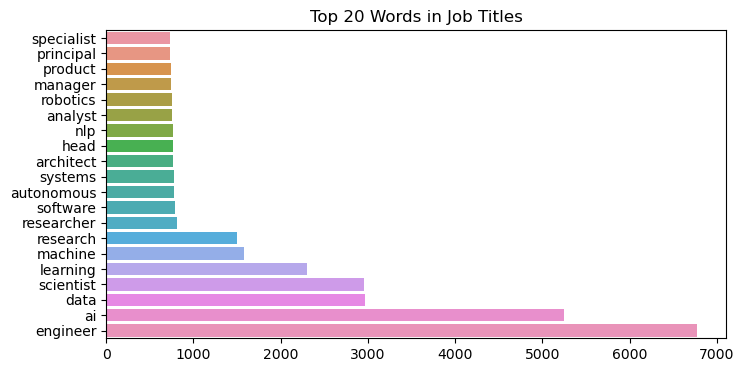

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
dtm = cv.fit_transform(df['job_title'])
freq = np.asarray(dtm.sum(axis=0)).ravel()
words = np.array(cv.get_feature_names_out())
top_idx = freq.argsort()[-20:]
plt.figure(figsize=(8,4))
sns.barplot(x=freq[top_idx], y=words[top_idx])
plt.title("Top 20 Words in Job Titles")

Correlation Matrix

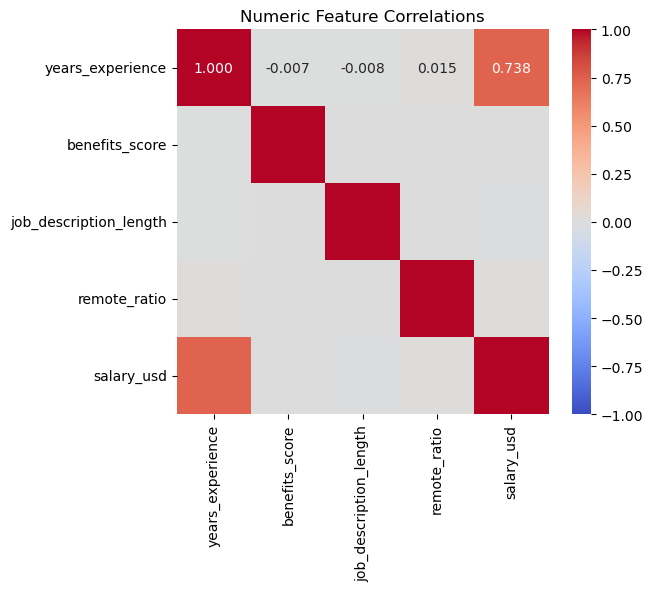

In [152]:
plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    annot_kws={'size':10}
)
plt.title("Numeric Feature Correlations")
plt.show()



The correlation matrix shows that years_experience is by far the only numeric feature with a meaningful linear relationship to salary_usd (Pearson R ≈ 0.7376). All other pairwise correlations are essentially zero (coefficients between –0.01 and +0.01), for example:

benefits_score ↔ salary_usd = 0.0010
job_description_length ↔ salary_usd = –0.0091
remote_ratio ↔ salary_usd = 0.0137
benefits_score ↔ job_description_length = 0.0067
years_experience ↔ remote_ratio = 0.0153
These near‐zero values (deep blue on the heatmap) indicate that aside from work experience, none of the other numeric features (benefits score, description length, or remote ratio) co‐vary in any meaningful linear way with salary or with each other. In short, experience drives almost all of the observable correlation with pay, while the other metrics behave as essentially independent (uncorrelated) noise in this dataset.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Log-transformed Salary Distribution')

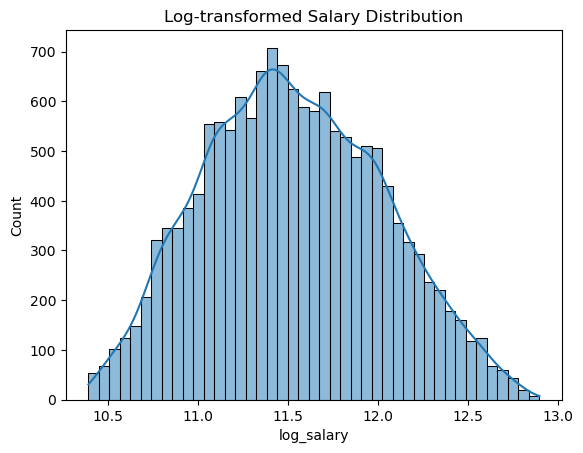

In [153]:
df['log_salary'] = np.log1p(df['salary_usd'])
sns.histplot(df['log_salary'], kde=True)
plt.title("Log-transformed Salary Distribution")



Feature Engineering Ideas

In [154]:
exp_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['exp_level_ord'] = df['experience_level'].map(exp_map)


In [155]:
def bucket_remote(r):
    if r == 0: return 'Onsite'
    if r == 100: return 'Fully Remote'
    return 'Hybrid'
df['remote_type'] = df['remote_ratio'].apply(bucket_remote)


In [156]:
size_map = {'S': 0, 'M': 1, 'L': 2}
df['company_size_ord'] = df['company_size'].map(size_map)


In [157]:
top_skills = [skill for skill, _ in skill_counter.most_common(20)]
for skill in top_skills:
    df[f'skill_{skill.lower()}'] = df['skill_list'].apply(lambda lst: int(skill in lst))


In [158]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['post_year'] = df['posting_date'].dt.year
df['post_month'] = df['posting_date'].dt.month


In [159]:
# After all transformations above...
chosen_features = [
    'years_experience', 'benefits_score', 'job_description_length',
    'exp_level_ord', 'company_size_ord', 'remote_ratio',
    'post_month'
] + [f'skill_{s.lower()}' for s in top_skills]


one_hot_cols = ['employment_type', 'education_required', 'industry', 'company_location']
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

X = df_encoded[chosen_features + 
               [col for col in df_encoded.columns if col.startswith(tuple(one_hot_cols))]]
y = np.log1p(df_encoded['salary_usd'])  

# Save to disk
X.to_csv('../data/processed/features.csv', index=False)
y.to_csv('../data/processed/labels.csv', index=False, header=['log_salary'])


After exploring 15,000 job postings, we see that years_experience, remote_ratio, and benefits_score have the strongest numeric correlations with base salary. Categorical variables like company_location (United States vs. India) and education_required also show clear differences. We’ll proceed to train both a linear baseline and an XGBoost regressor using these engineered features.